# Análise de Reclamações do Nubank no Reclame Aqui <a id='titulo-principal'></a>
## Web Scraping e Análise de Dados Textuais

---

### Sumário
- [Propósito](#proposito)
- [Contexto do Projeto](#contexto-do-projeto)
- [Dataset](#dataset)
  - [Extração dos Dados](#extracao-dos-dados)
  - [Web Scraping](#web-scraping)
  - [Preparo dos Dados](#preparo-dos-dados)
- [Exploração dos Dados](#exploracao-dos-dados)
  - [Métricas Gerais](#metricas-gerais)
- [Análise de Texto](#analise-de-texto)
  - [Pré-processamento](#pre-processamento)
  - [Identificação de Sentimentos](#identificao-de-sentimentos)
- [Visualizações](#visualizacoes)
- [Insights e Recomendações](#insights-e-recomendacoes)
- [Notas e Advertências](#notas-e-advertencias)
- [Conclusões](#conclusoes)

---

### Propósito <a id='proposito'></a>
Este projeto tem como objetivo demonstrar técnicas de web scraping e análise de dados textuais, utilizando reclamações do Nubank coletadas no Reclame Aqui. A ideia é identificar padrões e fornecer insights úteis para o Nubank melhorar seus serviços, respondendo a perguntas como "Qual é o tipo de reclamação mais comum?" e "Quais áreas merecem mais atenção?".

A realidade de um analista de dados? Esqueça a utopia de queries perfeitas e arquivos CSV prontos para uso. No mundo real, precisamos caçar dados valiosos como verdadeiros detetives, explorando cada fonte possível para extrair os insights que transformarão o rumo dos negócios.


### Contexto do Projeto <a id='contexto-do-projeto'></a>
O **Reclame Aqui** é uma plataforma onde consumidores registram reclamações sobre empresas. O **Nubank**, uma fintech líder no Brasil, é alvo de diversas reclamações que podem revelar pontos de insatisfação. Este projeto usa web scraping para coletar esses dados e análise textual para extrair informações estratégicas. Este projeto não apenas simula os desafios reais de 'garimpar' informações valiosas, mas demonstra como ferramentas de extração automatizada transformam dados dispersos em ouro estratégico. Uma prova viva de que, no mundo dos dados, quem sabe caçar tem vantagem competitiva.


### Dataset <a id='dataset'></a>

#### Extração dos Dados <a id='extracao-dos-dados'></a>
O Reclame Aqui, apesar de oferecer serviços de API para as empresas, esses serviços são pagos. Pensando que nem toda empresa tem recursos infinitos para pagar todo tipo de serviço, aqui escolhemos demonstrar o caminho da mineração direta. Com Python em mãos, mergulhamos na plataforma, extraindo informações preciosas sem investir um centavo. Esta técnica de web scraping não é apenas uma alternativa gratuita – é uma demonstração prática de como transformar códigos simples em ferramentas poderosas de inteligência competitiva.

Para esse pequeno projeto escolhemos coletar o título e a breve descrição da reclamação postada por cada cliente.

#### Web Scraping - Código <a id='web-scraping'></a>

Mas o que é esse web scraping? O Python + Selenium permite a automação da navegação em sites, simulando o comportamento de um usuário real. Ele segue um fluxo estruturado, acessando páginas, interagindo com elementos e extraindo informações com base nas tags HTML e seletores CSS definidos no código. Para isso, é essencial ter um conhecimento básico de HTML e CSS, pois é através dessas estruturas que o código identifica e coleta os dados necessários. Com Selenium, é possível navegar entre páginas, clicar em botões, preencher formulários e rolar a tela automaticamente, tornando a raspagem de dados eficiente e precisa.

Lembrando que existe uma variedade de formas para executar o web scraping, utilizando o Puppeteer ou Cheerio que é atráves do JavaScript, BeautifulSoup ou Scrapy que utilizam o Python.
Neste projeto, utilizei Python + Selenium Base para coletar as reclamações. Vamos ver como funcionou o processo de coleta dos dados:

In [ ]:
from seleniumbase import Driver
import time
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

Acima vemos que primeiro, trouxe os reforços necessários (as bibliotecas que vamos utilizar): 
   - Selenium (seleniumbase): nosso "navegador robô" que automatiza a exploração do site
   - Pandas: para organizar os dados coletados em tabelas
   - Time: para dar pausas estratégicas, evitando que o site nos bloqueie

In [ ]:
# Configurar o driver
driver = Driver(uc=True, browser="chrome")

# Navegar até a página
driver.get("https://www.reclameaqui.com.br/empresa/nubank/lista-reclamacoes/")
time.sleep(5)

Em seguida, configurei o "robô explorador":
   - Criei um driver Chrome em modo "invisível" (uc=True)
   - Direcionei-o para a página de reclamações do Nubank
   - Dei 5 segundos para a página carregar completamente

In [ ]:
# Clicar no botão "Últimas"
ultimas_button = driver.find_element("xpath", "//button[text()='Últimas']")
driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", ultimas_button)
time.sleep(1)
driver.execute_script("arguments[0].click();", ultimas_button)
time.sleep(2)

Para conseguir os dados mais atuais:
   - Localizei e cliquei no botão "Últimas" usando xpath
   - Usei scrollIntoView para garantir que o botão estivesse visível
   - Programei 2 segundos de espera para a nova ordenação carregar

In [ ]:
wait = WebDriverWait(driver, 30)

# Definir número de páginas a raspar
num_pages = 50
data = []

# Loop para raspar as páginas
for page in range(num_pages):
    try:
        wait.until(EC.presence_of_element_located(("css selector", ".sc-1pe7b5t-0.eJgBOc")))
    except:
        break
    
    driver.execute_script("window.scrollBy(0, 1000);")
    time.sleep(2)
    
    complaint_divs = driver.find_elements("css selector", ".sc-1pe7b5t-0.eJgBOc")
    
    for div in complaint_divs:
        try:
            title = div.find_element("tag name", "h4").text
            description = div.find_element("tag name", "p").text
            data.append({"title": title, "description": description})
        except:
            pass
    
    if page < num_pages - 1:
        try:
            next_button = wait.until(EC.element_to_be_clickable(("xpath", "//button[@aria-label='botão de navegação para a próxima página']")))
            driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", next_button)
            time.sleep(1)
            driver.execute_script("arguments[0].click();", next_button)
            time.sleep(10)
            driver.refresh()
            time.sleep(5)
        except:
            break

# Criar DataFrame e salvar em CSV
df = pd.DataFrame(data)
df.to_csv("reclamacoes.csv", index=False, encoding="utf-8")

# Fechar o navegador
driver.quit()

Função para uma coleta robusta:
   - Configurei um sistema de espera inteligente (WebDriverWait)
   - Defini que queria coletar dados de 50 páginas de reclamações
   - Criei uma lista vazia para armazenar todos os dados raspados

A partir desse código a coleta fica nesse loop até a página indicada, e assim vamos jogando o título e a breve descrição da postagem na lista com nome *data* que depois exportamos para um CSV com o nome de *reclamacoes.csv* - transformando o que seria horas de trabalho manual em um processo automático de minutos.

### Preparo dos Dados <a id='preparo-dos-dados'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

# Configurações para visualização
plt.style.use('ggplot')
sns.set(font_scale=1.2)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

# Carregar o dataset
df = pd.read_csv('reclamacoes.csv')

In [2]:
# Verificar duplicatas
def verificar_duplicatas(df):
    print(f"Número de reclamações duplicadas: {df.duplicated().sum()}")
    return df[df.duplicated(keep=False)].sort_values(by='title')

verificar_duplicatas(df)


Número de reclamações duplicadas: 44


,title,description
460,*******,Eu fiquei realmente sem condição de pagar o ca...
459,*******,Eu fiquei realmente sem condição de pagar o ca...
5,AUMENTO DE LIMITE NO CARTÃO DE CRÉDITO,"Olá, Estou tentando aumento de limite no meu c..."
10,AUMENTO DE LIMITE NO CARTÃO DE CRÉDITO,"Olá, Estou tentando aumento de limite no meu c..."
31,Alguém fez uma compra de 10 reías no meu cartã...,"Hoje, acordei pela manhã e recebi uma notifica..."
...,...,...
94,Tentei cancelar o empréstimo em menos de 24 ho...,Tentei cancelar o empréstimo do Nubank Em meno...
11,Venda de fundos imobiliários BTHF11,Estou tentando a mais de 1 mês realizar a vend...
6,Venda de fundos imobiliários BTHF11,Estou tentando a mais de 1 mês realizar a vend...
119,[Editado pelo Reclame Aqui] PIX NUBANK PARA OU...,"Foi efetuado 3 Pix da minha conta , para outra..."


Verificando e depois removendo os dados duplicados.

```
Número de reclamações duplicadas: 44
title	description	title_length	description_length
460	*******	Eu fiquei realmente sem condição de pagar o ca...	7	128
459	*******	Eu fiquei realmente sem condição de pagar o ca...	7	128
5	AUMENTO DE LIMITE NO CARTÃO DE CRÉDITO	Olá, Estou tentando aumento de limite no meu c...	38	116
10	AUMENTO DE LIMITE NO CARTÃO DE CRÉDITO	Olá, Estou tentando aumento de limite no meu c...	38	116
31	Alguém fez uma compra de 10 reías no meu cartã...	Hoje, acordei pela manhã e recebi uma notifica...	56	128
...	...	...	...	...
94	Tentei cancelar o empréstimo em menos de 24 ho...	Tentei cancelar o empréstimo do Nubank Em meno...	64	128
11	Venda de fundos imobiliários BTHF11	Estou tentando a mais de 1 mês realizar a vend...	35	128
6	Venda de fundos imobiliários BTHF11	Estou tentando a mais de 1 mês realizar a vend...	35	128
119	[Editado pelo Reclame Aqui] PIX NUBANK PARA OU...	Foi efetuado 3 Pix da minha conta , para outra...	62	128
120	[Editado pelo Reclame Aqui] PIX NUBANK PARA OU...	Foi efetuado 3 Pix da minha conta , para outra...	62	128
83 rows × 4 columns
```

In [3]:
df = df.drop_duplicates(subset='title', keep='first')

# Verificar duplicatas
def verificar_duplicatas(df):
    print(f"Número de reclamações duplicadas: {df.duplicated().sum()}")
    return df[df.duplicated(keep=False)].sort_values(by='title')

verificar_duplicatas(df)

Número de reclamações duplicadas: 0


,title,description


Número de reclamações duplicadas: 0

## Exploração dos Dados <a id='exploracao-dos-dados'></a>

### Métricas Gerais <a id='metricas-gerais'></a>

In [ ]:
# Verificar informações do dataframe
print(df.info())

```
<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 499
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               411 non-null    object
 1   description         411 non-null    object
 2   title_length        411 non-null    int64 
 3   description_length  411 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 16.1+ KB
```

In [4]:
# Classificar reclamações por tipo/categoria (com base no título)
def classificar_reclamacoes(df):
    # Lista de palavras-chave para categorias comuns
    categorias = {
        'Cartão de Crédito': ['cartão', 'cartao', 'crédito', 'credito', 'fatura', 'limite', 'juros'],
        'Conta': ['conta', 'bloqueio', 'bloquearam', 'saldo', 'negativo', 'encerr'],
        'Pagamentos': ['pagamento', 'transferência', 'transferencia', 'boleto', 'débito', 'debito'],
        'Investimentos': ['investimento', 'tesouro', 'rendimento', 'fundo', 'cdb'],
        'Segurança': ['fraude', 'clonado', 'clonagem', '[Editado pelo Reclame Aqui]', 'desconhecida', 'indevida'],
        'Empréstimo': ['empréstimo', 'emprestimo', 'financiamento', 'parcel'],
        'Atendimento': ['atendimento', 'suporte', 'contato', 'ligações', 'funcionário'],
        'Pix': ['pix']
    }
    
    def categorizar_titulo(titulo):
        titulo_lower = titulo.lower()
        for categoria, keywords in categorias.items():
            if any(keyword in titulo_lower for keyword in keywords):
                return categoria
        return 'Outros'
    
    df['categoria'] = df['title'].apply(categorizar_titulo)
    return df['categoria'].value_counts().reset_index().rename(columns={'index': 'Categoria', 'categoria': 'Quantidade'})

classificar_reclamacoes(df)

,Quantidade,count
0,Outros,141
1,Cartão de Crédito,139
2,Conta,59
3,Empréstimo,19
4,Pagamentos,15
5,Segurança,13
6,Pix,10
7,Investimentos,8
8,Atendimento,7


Nessa etapa categorizamos as reclamações baseado em algumas palavras-chave contidas no título. Isso será útil para que na hora de criarmos as visualizações, consigamos ter uma ideia geral de quais problemas se destacam dos outros.

```
	Quantidade	count
0	Outros	141
1	Cartão de Crédito	139
2	Conta	59
3	Empréstimo	19
4	Pagamentos	15
5	Segurança	13
6	Pix	10
7	Investimentos	8
8	Atendimento	7
```

## Análise de Texto <a id='analise-de-texto'></a>

### Pré-processamento <a id='pre-processamento'></a>

In [5]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer


Nessa etapa vamos utilizar o NLTK que é uma biblioteca clássica de NLP (Processamento de Linguagem Natural) que fornece ferramentas como tokenização, remoção de stopwords, stemming e lematização. Ele é útil para pré-processar textos antes da análise.

In [5]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer

# Função aprimorada para limpar e preparar o texto
def preprocessar_texto(texto):
    if not isinstance(texto, str):
        return ""
    texto = texto.lower()
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)  # Remove URLs
    texto = re.sub(r'[^\w\s]', '', texto)  # Remove pontuação e símbolos
    texto = re.sub(r'\d+', '', texto)  # Remove números
    texto = re.sub(r'\s+', ' ', texto).strip()  # Remove espaços extras
    return texto

# Tokenização, remoção de stopwords e stemming
def tokenizar_remover_stopwords_stemming(texto):
    if not texto:
        return []
    tokens = word_tokenize(texto, language='portuguese')
    stop_words = set(stopwords.words('portuguese'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    stemmer = RSLPStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

# Aplicar o pré-processamento no DataFrame
def preprocessar_dataframe(df):
    df['titulo_limpo'] = df['title'].apply(preprocessar_texto)
    df['descricao_limpa'] = df['description'].apply(preprocessar_texto)
    df['tokens_titulo'] = df['titulo_limpo'].apply(tokenizar_remover_stopwords_stemming)
    df['tokens_descricao'] = df['descricao_limpa'].apply(tokenizar_remover_stopwords_stemming)
    return df

df= preprocessar_dataframe(df)

### Identificação de Sentimento <a id='identificao-de-sentimentos'></a>

Para marcamos o sentimento de cada título e descrição usaremos o Hugging Face (Transformers), ele oferece modelos pré-treinados baseados em Redes Neurais e Deep Learning, como o BERT e DistilBERT, que analisam sentimentos com maior precisão ao considerar o contexto completo das palavras.

In [6]:
import pandas as pd
from transformers import pipeline

# Carregar o modelo de sentimento do Hugging Face
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Função para analisar sentimento e retornar apenas o número (1 a 5)
def analisar_sentimento(texto):
    if not isinstance(texto, str):
        return 3  # Valor padrão (neutro) pra textos inválidos
    try:
        resultado = sentiment_pipeline(texto[:512])[0] 
        nota = int(resultado['label'].split()[0]) 
        return nota
    except:
        return 3 

# Aplicar a análise ao título e descrição
df['sentimento_titulo'] = df['titulo_limpo'].apply(analisar_sentimento)
df['sentimento_descricao'] = df['descricao_limpa'].apply(analisar_sentimento)

df.to_csv("reclamacoes_processadas.csv", index=False, encoding="utf-8")




Device set to use cpu


## Visualizações <a id='visualizacoes'></a>

Hora de juntar todas as nossas análises e visualiza-las para começarmos a ter uma absorção mais fácil de todos esses números e resultados que obtivemos ao tratar e manipular os dados coletados.

In [9]:
from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import bigrams
from collections import Counter

In [ ]:
def plot_distribuicao_categorias(df):
    plt.figure(figsize=(12, 6))
    
    categoria_counts = df['categoria'].value_counts(ascending=True)
    categorias = categoria_counts.index
    frequencias = categoria_counts.values
    
    n_colors = len(categorias)
    colors = plt.cm.BuPu_r([1 - (i / n_colors) for i in range(n_colors)])
    
    bars = plt.barh(categorias, frequencias, color=colors)
    
    for bar in bars:
        width = bar.get_width()
        plt.text(
            width + 5,
            bar.get_y() + bar.get_height() / 2,
            f'{int(width)}',
            ha='left',
            va='center',
            fontsize=10
        )
    
    plt.title('Distribuição de Categorias de Reclamações')
    plt.xlabel('Número de Reclamações')
    plt.ylabel('Categoria')
    plt.tight_layout()
    return plt

# Chamar a função e exibir o gráfico
plot_distribuicao_categorias(df)
plt.show()

![image](dist_cate_rec.png)

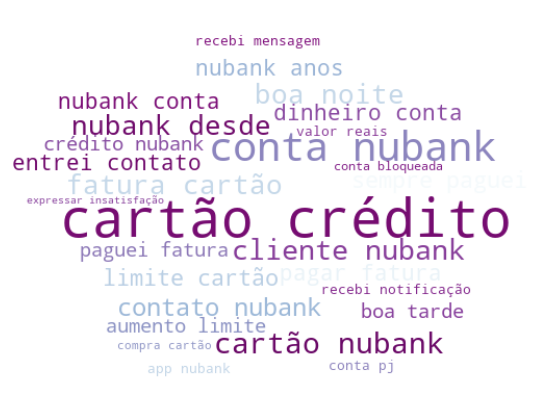

In [10]:
# Carregar o CSV e Imagem WordCloud
df = pd.read_csv('reclamacoes_processadas.csv')
mask = np.array(Image.open("mask-cloud.png"))

# Carregar stopwords em português e adicionar palavras irrelevantes
stop_words = set(stopwords.words('portuguese'))
stop_words.update(['porém', 'tive', 'é', 'aqui', 'lá', 'pra', 'pro', 'dia', 'fiz',
'pois', 'isso', 'aquilo', 'editado', 'venho', 'meio', 'r', 'reclame'])

# Função para gerar bigramas e filtrar stopwords
def generate_bigrams(text):
    words = text.split() 
    words = [word for word in words if word not in stop_words]
    bigram_list = list(bigrams(words))
    bigram_str = [' '.join(bigram) for bigram in bigram_list]
    return bigram_str


all_bigrams = []
for desc in df['descricao_limpa'].dropna():
    bigrams_desc = generate_bigrams(desc)
    all_bigrams.extend(bigrams_desc)

bigram_freq = Counter(all_bigrams)

# Criar a nuvem de palavras com base nos bigramas
wordcloud = WordCloud(width=800, height=400,background_color="white",colormap='BuPu_r', mask=mask, contour_color="black", min_font_size=10).generate_from_frequencies(bigram_freq)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

![Image](wordcloud_output.png)

In [ ]:

def plot_frequencia_palavras_completas(texto_coluna, titulo, stop_words):
    all_text = ' '.join(texto_coluna.dropna())
    palavras = all_text.split()
    
    palavras = [p for p in palavras if len(p) > 2 and p.lower() not in stop_words]
    
    word_freq = Counter(palavras).most_common(10)
    palavras, frequencias = zip(*word_freq)
    
    palavras = palavras[::-1]
    frequencias = frequencias[::-1]
    
    # Plotar o gráfico
    plt.figure(figsize=(10, 6))
    bars = plt.barh(palavras, frequencias, color='#820AD1')
   
    for bar in bars:
        width = bar.get_width()  
        plt.text(
            width + 1,
            bar.get_y() + bar.get_height() / 2,  
            f'{int(width)}',  
            ha='left',        
            va='center',      
            fontsize=10,      
            color='#BC8AE1'     
        )
    
    plt.xlabel('Frequência')
    plt.title(f'Palavras Mais Frequentes em {titulo}')
    plt.tight_layout()
    plt.show()

plot_frequencia_palavras_completas(df['titulo_limpo'], 'Títulos das Reclamações', stop_words)
plot_frequencia_palavras_completas(df['descricao_limpa'], 'Descrições das Reclamações', stop_words)

![image](pala_freq01.png)

![image](pala_freq02.png)

In [ ]:
sentimento_titulo_counts = df['sentimento_titulo'].value_counts().sort_index()
sentimento_descricao_counts = df['sentimento_descricao'].value_counts().sort_index()

# Definir posições das barras
notas = [1, 2, 3, 4, 5]
bar_width = 0.35  # Largura das barras
x = range(len(notas))

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.bar([i - bar_width/2 for i in x], sentimento_titulo_counts[notas], bar_width, label='Títulos', color='#820AD1')  # Roxo Nubank
plt.bar([i + bar_width/2 for i in x], sentimento_descricao_counts[notas], bar_width, label='Descrições', color='#BC8AE1')  # Roxo claro

# Adicionar valores acima das barras
for i in x:
    plt.text(i - bar_width/2, sentimento_titulo_counts[notas[i]] + 5, f'{int(sentimento_titulo_counts[notas[i]])}', 
             ha='center', va='bottom', fontsize=10)
    plt.text(i + bar_width/2, sentimento_descricao_counts[notas[i]] + 5, f'{int(sentimento_descricao_counts[notas[i]])}', 
             ha='center', va='bottom', fontsize=10)

# Personalizar o gráfico
plt.xlabel('Nota de Sentimento (1 a 5)')
plt.ylabel('Número de Reclamações')
plt.title('Distribuição de Sentimentos em Títulos e Descrições')
plt.xticks(x, notas)
plt.legend()
plt.tight_layout()

# Exibir o gráfico
plt.show()

![image](dist_sent01.png)

## Insights e Recomendações <a id='insights-e-recomendacoes'></a>

## Notas e Advertências <a id='notas-e-advertencias'></a>

## Conclusões <a id='conclusoes'></a>